

# **Edge Detection in Computer Vision**  


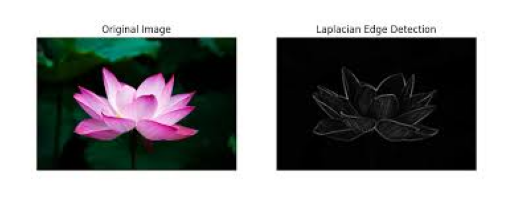

In [1]:
import cv2
import matplotlib.pyplot as plt

# Provide the correct path to your image
image_path = '/content/drive/MyDrive/download.jfif'

# Read and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

# Show the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()



## **1. Introduction to Edge Detection**  
### **1.1 What is Edge Detection?**  
Edge detection is a fundamental technique in image processing and computer vision used to identify the boundaries of objects within an image. It helps in:  
- Object detection and recognition  
- Image segmentation  
- Feature extraction for machine learning models  

### **1.2 Why is Edge Detection Important?**  
- Reduces the amount of data while preserving the structural properties  
- Helps detect shapes and structures in images  
- Enhances image analysis in fields like medical imaging, autonomous vehicles, and facial recognition  

### **1.3 Applications of Edge Detection**  
- Medical imaging (detecting tumors in MRI/CT scans)  
- Surveillance (object tracking in security footage)  
- Autonomous driving (detecting lanes and obstacles)  
- Document processing (handwriting recognition, optical character recognition)  



## **2. Edge Detection Techniques**  
Several techniques are used for edge detection, including:  

### **2.1 Gradient-Based Methods**  
- Uses first-order derivatives (e.g., Sobel, Prewitt)  
- Detects edges by computing intensity changes in the image  

### **2.2 Laplacian-Based Methods**  
- Uses second-order derivatives (Laplacian operator)  
- Detects edges based on rapid intensity changes but is more sensitive to noise  

### **2.3 Canny Edge Detection**  
- A multi-step process that includes noise reduction, gradient calculation, non-maximum suppression, and edge tracking  





## **3. Gradient-Based Edge Detection Methods**  
### **3.1 Sobel Operator**  
The Sobel operator computes the gradient in both **x** and **y** directions using convolutional kernels:  

\[
G_x =  
\begin{bmatrix}  
-1 & 0 & 1 \\  
-2 & 0 & 2 \\  
-1 & 0 & 1  
\end{bmatrix}  
\]

\[
G_y =  
\begin{bmatrix}  
-1 & -2 & -1 \\  
0 & 0 & 0 \\  
1 & 2 & 1  
\end{bmatrix}  
\]

The gradient magnitude is computed as:  
\[
G = \sqrt{G_x^2 + G_y^2}
\]  

#### **Code for Sobel Edge Detection**
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1,3,3), plt.imshow(sobel_edge, cmap='gray'), plt.title('Edge Magnitude')
plt.show()
```

---

### **3.2 Prewitt Operator**  
Similar to the Sobel operator but uses equal weight in computing gradients:  

\[
G_x =  
\begin{bmatrix}  
-1 & 0 & 1 \\  
-1 & 0 & 1 \\  
-1 & 0 & 1  
\end{bmatrix}  
\]

\[
G_y =  
\begin{bmatrix}  
-1 & -1 & -1 \\  
0 & 0 & 0 \\  
1 & 1 & 1  
\end{bmatrix}  
\]

```python
# Apply Prewitt operator
prewitt_x = cv2.filter2D(image, -1, np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1,-1,-1],[0,0,0],[1,1,1]]))

# Compute edge magnitude
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1,3,2), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(1,3,3), plt.imshow(prewitt_edge, cmap='gray'), plt.title('Edge Magnitude')
plt.show()
```





## **4. Laplacian Edge Detection**  
Uses a second-order derivative to detect regions of rapid intensity change:  

\[
L =  
\begin{bmatrix}  
0 & 1 & 0 \\  
1 & -4 & 1 \\  
0 & 1 & 0  
\end{bmatrix}  
\]
```python
# Apply Laplacian operator
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display result
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()
```

---

## **5. Canny Edge Detection (Optimal Approach)**  
The **Canny Edge Detector** is the most effective method, using the following steps:  
1. **Noise Reduction** – Apply Gaussian Blur  
2. **Gradient Calculation** – Compute intensity gradients  
3. **Non-Maximum Suppression** – Thin the edges  
4. **Hysteresis Thresholding** – Filter weak edges based on thresholds  


```python
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Apply Canny edge detector
canny_edges = cv2.Canny(blurred, 100, 200)

# Display result
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()
```

---

## **6. Comparison of Edge Detection Methods**
| Method | Advantages | Disadvantages |
|--------|------------|--------------|
| Sobel | Simple to compute | Sensitive to noise |
| Prewitt | Similar to Sobel but faster | Less accurate |
| Laplacian | Detects edges in all directions | More noise-sensitive |
| Canny | Optimal and robust | Computationally expensive |




### **Canny Edge Detection**  
- What is Canny Edge Detection?  
- Why is it considered one of the best edge detection techniques?  
- Applications in real-world scenarios (e.g., self-driving cars, medical imaging, surveillance).  



### **Steps in Canny Edge Detection**  
1. **Noise Reduction** – Apply Gaussian Blur to remove noise.  
2. **Compute Intensity Gradient** – Use Sobel operators to find gradients.  
3. **Non-Maximum Suppression** – Remove unwanted pixels to get thin edges.  
4. **Hysteresis Thresholding** – Keep strong edges and remove weak edges based on threshold values.  



### **Understanding Thresholding in Canny**  
- Low and high threshold values.  
- The role of weak and strong edges in the final output.  





## **Easy Steps to Implement Canny Edge Detection in Python**  

### **Step 1: Import Required Libraries**  
```python
import cv2
import matplotlib.pyplot as plt
```

### **Step 2: Load the Image**  
```python
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
```

### **Step 3: Apply Gaussian Blur to Reduce Noise**  
```python
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)  # (kernel size, standard deviation)
```

### **Step 4: Apply Canny Edge Detection**  
```python
edges = cv2.Canny(blurred, 100, 200)  # (low threshold, high threshold)
```

### **Step 5: Display the Result**  
```python
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')  # Hide axes
plt.show()
```


# **Python CODE**


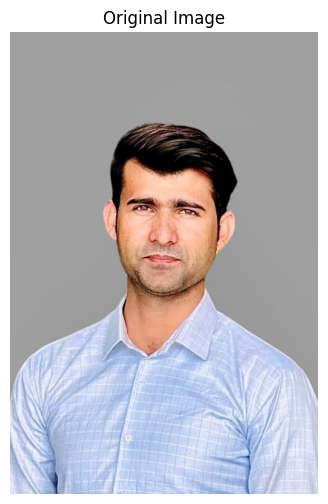

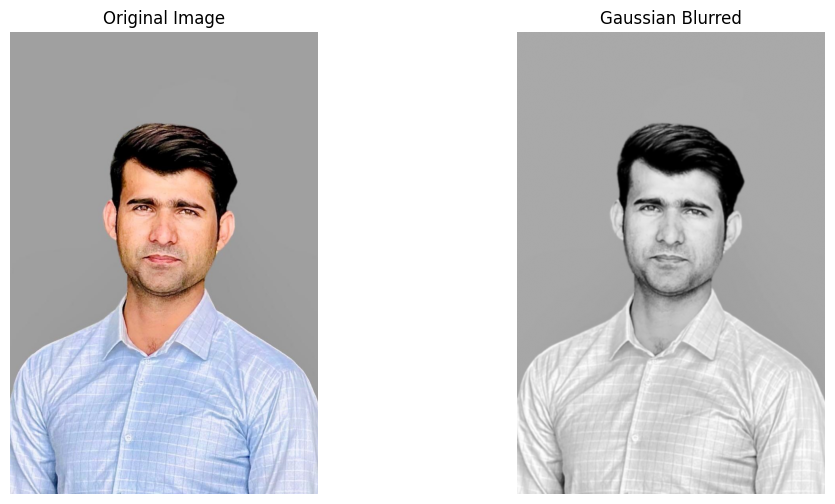

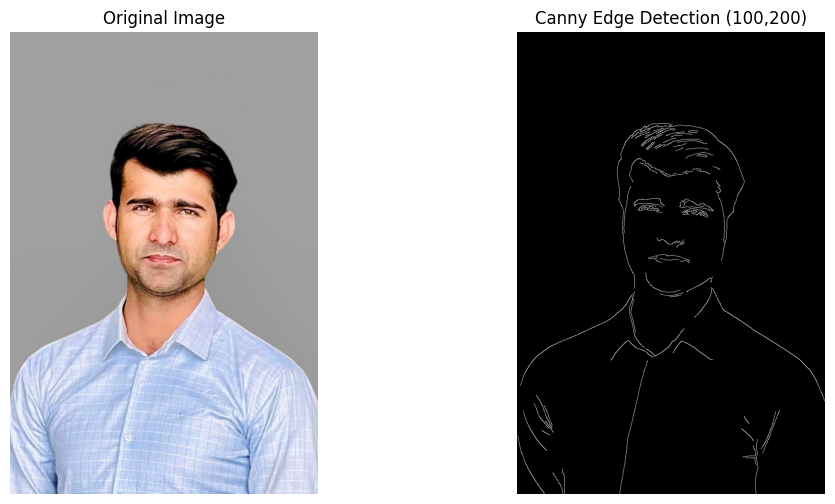

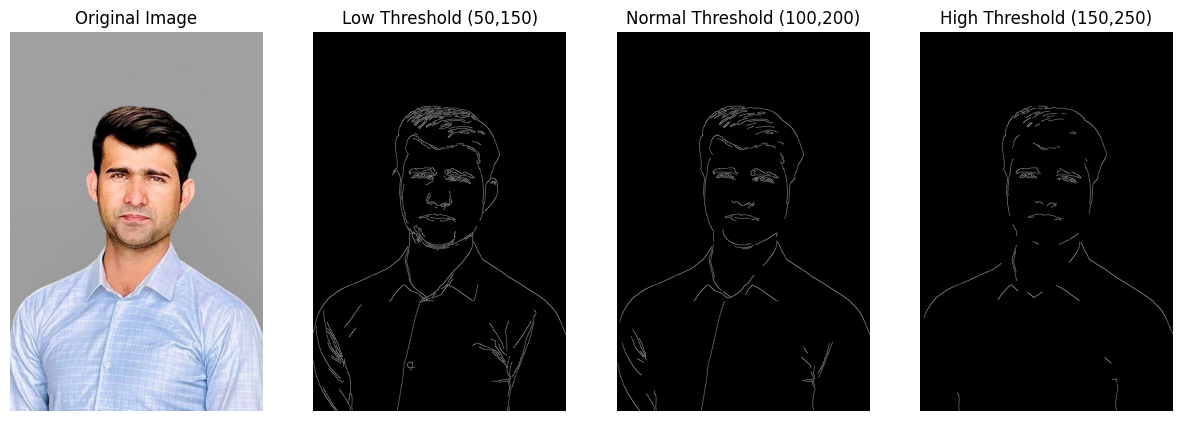

In [13]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load and Show the Exact Original Image
image = cv2.imread('/content/drive/MyDrive/mypic.jpeg')  # Load the original image in color
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

# Display the Original Image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur (Noise Reduction)
blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

# Compare Blurred Image with Original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(blurred, cmap='gray'), plt.title('Gaussian Blurred')
plt.axis('off')
plt.show()

# Step 4: Apply Canny Edge Detection
edges = cv2.Canny(blurred, 100, 200)

# Compare Canny Edge Detection with Original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection (100,200)')
plt.axis('off')
plt.show()

# Step 5: Experiment with Different Thresholds
edges_low = cv2.Canny(blurred, 50, 150)
edges_high = cv2.Canny(blurred, 150, 250)

# Compare Different Thresholds with Original
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1), plt.imshow(image_rgb), plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(edges_low, cmap='gray'), plt.title('Low Threshold (50,150)')
plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(edges, cmap='gray'), plt.title('Normal Threshold (100,200)')
plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(edges_high, cmap='gray'), plt.title('High Threshold (150,250)')
plt.axis('off')
plt.show()
